In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **HAAR Cascade Classifiers**

Developed by Viola and Jones in 2001.

An object detection method that uses a series of classifiers (cascade) to identify objects in an image. They are trained to identify one type of object, however, we can use several of them in parallel e.g. detecting eyes and faces together. HAAR Classifiers are trained using lots of positive images (i.e. images with the object present) and negative images (i.e. images without the object present).

/var/folders/rp/bysf588x0c79ljyqmrmd18240000gn/T/ipykernel_94016/1815550703.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces == ():


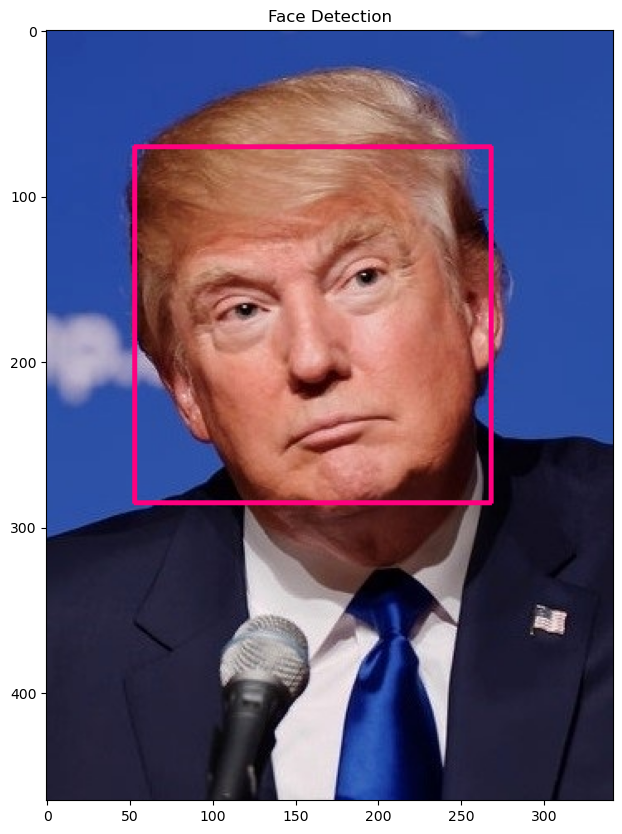

In [13]:
# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)

# When no faces detected, face_classifier returns and empty tuple
if faces == ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)

imshow('Face Detection', image)

/var/folders/rp/bysf588x0c79ljyqmrmd18240000gn/T/ipykernel_94016/2143791107.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces == ():


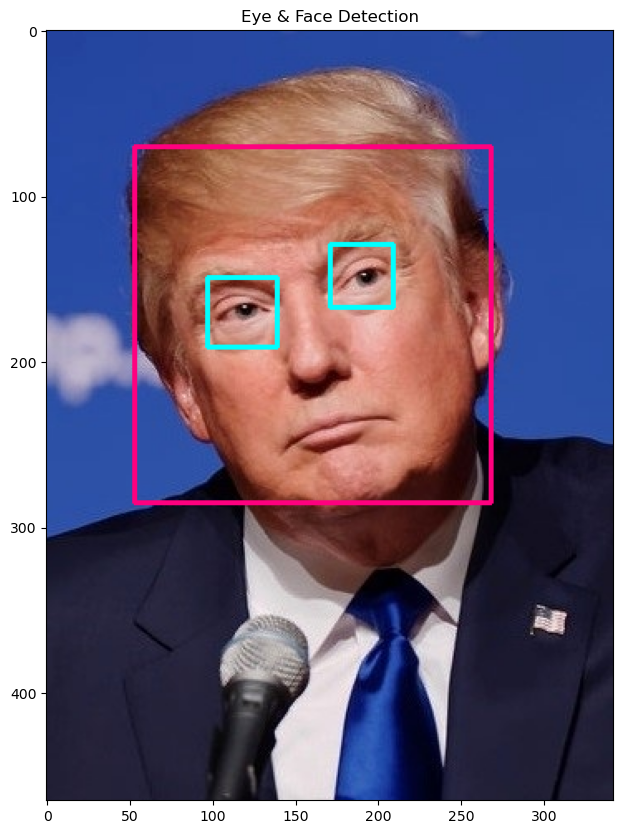

In [14]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
 
img = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces == ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.2, 3)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',img)

#### for colab

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

ModuleNotFoundError: No module named 'google.colab'

### local


In [2]:
import cv2

def take_photo(filename='photo.jpg', quality=0.8):
    # Open the webcam
    cap = cv2.VideoCapture(0)
    
    # Read the first frame
    ret, frame = cap.read()
    
    # Display the frame
    cv2.imshow('Webcam', frame)
    
    # Wait for the user to press a key
    cv2.waitKey(0)
    
    # Save the frame as an image
    cv2.imwrite(filename, frame)
    
    # Release the webcam
    cap.release()
    
    # Close all OpenCV windows
    cv2.destroyAllWindows()
    
    return filename

Saved to photo.jpg


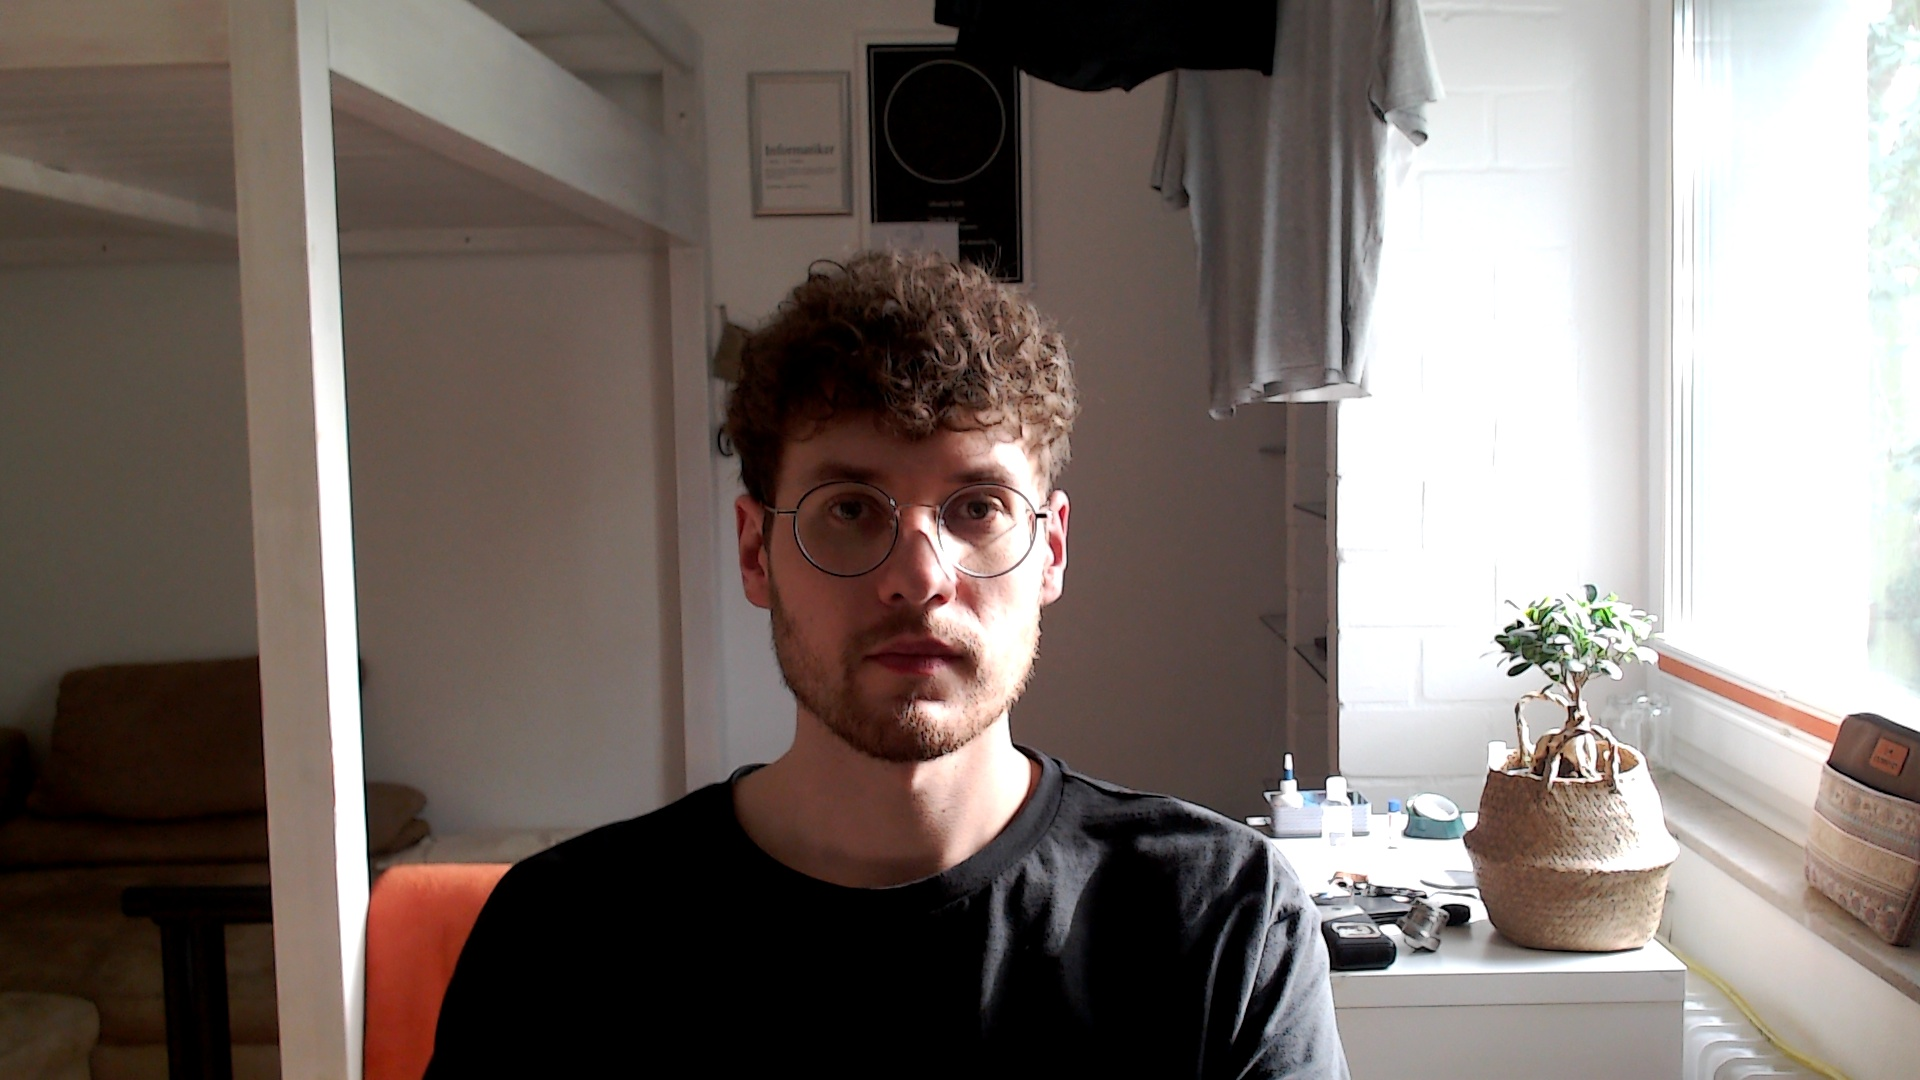

In [23]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

/var/folders/rp/bysf588x0c79ljyqmrmd18240000gn/T/ipykernel_95428/2139028825.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces == ():


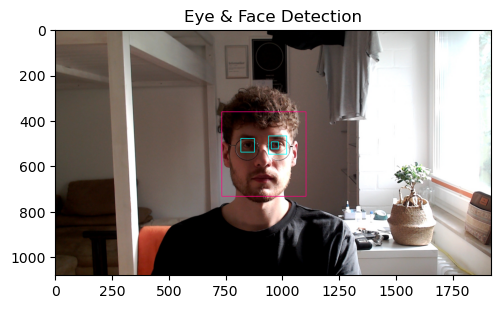

In [3]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
 
img = cv2.imread('photo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces == ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',img)

# live capture

##### the first code block does a wierd cropping of the image around the face that is found in the feed. 
##### this is changed in the later cell where the annatiations are doen in the live camera feed

In [1]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      

<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/rp/bysf588x0c79ljyqmrmd18240000gn/T/ipykernel_94393/119839224.py:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
2023-09-17 16:49:13.307 python[94393:15719680] =>> Checked Property: [cfen] 1667655022
2023-09-17 16:49:13.307 python[94393:15719680] =>> Checked Property: [cfen] 1667655022
2023-09-17 16:49:13.308 python[94393:15719680] =>> Checked Property: [peen] 1885693294
2023-09-17 16:49:13.308 python[94393:15719680] =>> Checked Property: [slen] 1936483694
2023-09-17 16:49:13.308 python[94393:15719680] =>> Checked Property: [strz] 1937011322
2023-09-17 16:49:13.308 python[94393:15719680] =>> Checked Property: [fden] 1717855598
2023-09-17 16:49:13.308 python[94393:15719680] =>> Checked Property: [hbde] 1751278693
2023-09-17 16:49:13.308 python[94393:15719680] =>> Checked Property: [flsh] 1718383464
2023-09-17 16:49:13.308 p

: 

: 

##### in this cell the feed is annotated in the same image, also some annotations of face and eyes are added to the boxes

In [1]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, 'Face', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)
            cv2.putText(roi_color, 'Eyes', (ex, ey-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            
    return img

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    annotated_frame = face_detector(frame)
    cv2.imshow('Our Face Extractor', annotated_frame)
    
    if cv2.waitKey(1) == 13: # 13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()

2023-09-17 16:56:16.528 python[94837:15726171] =>> Checked Property: [cfen] 1667655022
2023-09-17 16:56:16.529 python[94837:15726171] =>> Checked Property: [cfen] 1667655022
2023-09-17 16:56:16.529 python[94837:15726171] =>> Checked Property: [peen] 1885693294
2023-09-17 16:56:16.529 python[94837:15726171] =>> Checked Property: [slen] 1936483694
2023-09-17 16:56:16.529 python[94837:15726171] =>> Checked Property: [strz] 1937011322
2023-09-17 16:56:16.529 python[94837:15726171] =>> Checked Property: [fden] 1717855598
2023-09-17 16:56:16.529 python[94837:15726171] =>> Checked Property: [hbde] 1751278693
2023-09-17 16:56:16.529 python[94837:15726171] =>> Checked Property: [flsh] 1718383464
2023-09-17 16:56:16.529 python[94837:15726171] =>> Checked Property: [ascc] 1634952035
2023-09-17 16:56:16.529 python[94837:15726171] =>> Checked Property: [cfen] 1667655022
2023-09-17 16:56:16.530 python[94837:15726171] =>> Checked Property: [peen] 1885693294
2023-09-17 16:56:16.530 python[94837:157261

: 